In [1]:
import xarray as xr
import cmocean
import cartopy
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pandas as pd

### First, let's download the SST dataset we'll be exploring

`wget https://github.com/anthony-meza/WHOI-PO-HPC/blob/official_pilot_workshop/data/sst.day.mean.2021.2023.nc`

In [2]:
### Opening netCDF dataset w/ xarray
# xarray supports a lot of different file formats, but netCDF is probably most common

ds = xr.open_dataset('sst.day.mean.2021.2023.nc')

ds

<xarray.Dataset> Size: 140MB
Dimensions:  (time: 1095, lat: 89, lon: 359)
Coordinates:
  * time     (time) datetime64[ns] 9kB 2021-01-01 2021-01-02 ... 2023-12-31
  * lat      (lat) float64 712B -89.0 -87.0 -85.0 -83.0 ... 81.0 83.0 85.0 87.0
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0
Data variables:
    sst      (time, lat, lon) float32 140MB ...
Attributes:
    regrid_method:  bilinear

### How big is this dataset? What is the temporal and horizontal resolution? What variable does it include?

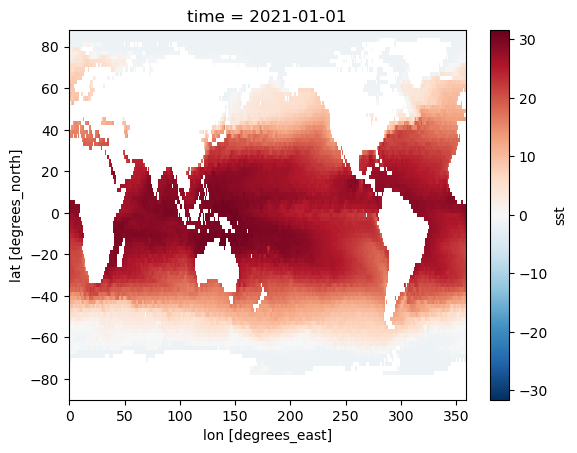

In [3]:
### Let's just start by plotting a single day of data

ds.isel(time=0).sst.plot.pcolormesh()

### Calculating monthly climatology of SST

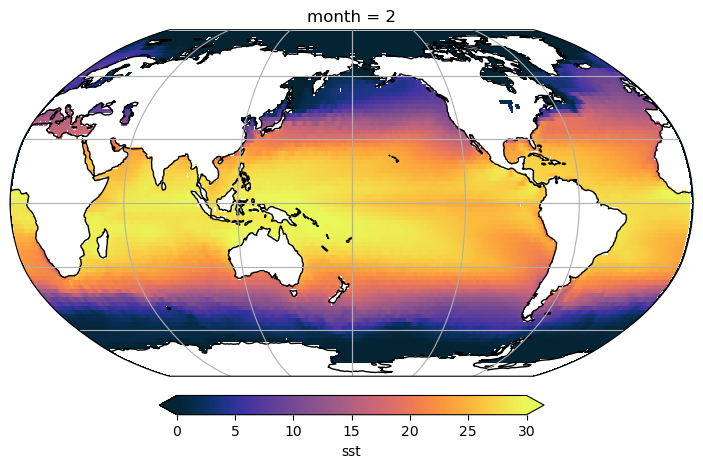

In [8]:
### We can easily compute statistical properties from this dataset
cbar_kwargs = dict(orientation = "horizontal", fraction = 0.05, pad=0.05)
kwargs = dict(x='lon', y='lat',transform = ccrs.PlateCarree(), cbar_kwargs = cbar_kwargs)

fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection':ccrs.Robinson(180)})

ax.coastlines()
ax.gridlines()
ax.set_global()

ds.groupby("time.month").mean().sel(month=2).sst.plot.pcolormesh(ax=ax, **kwargs, 
                                            cmap=cmocean.cm.thermal, vmin=0, vmax=30)

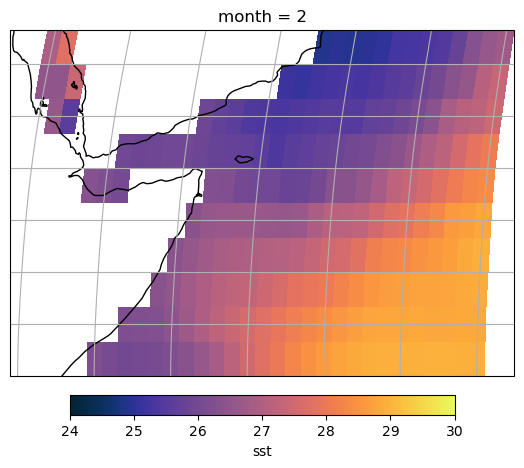

In [10]:
### First, let's look at the global anomaly at the start of our analysis period

cbar_kwargs = dict(orientation = "horizontal", fraction = 0.05, pad=0.05)
kwargs = dict(x='lon', y='lat',transform = ccrs.PlateCarree(), cbar_kwargs = cbar_kwargs)

fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection':ccrs.Robinson(180)})

ax.coastlines()
ax.gridlines()
#ax.set_global()

ds.groupby("time.month").mean().sel(month=2, lon=slice(40, 70), lat=slice(0,20)).sst.plot.pcolormesh(ax=ax, 
                                                                                        **kwargs, 
                                            cmap=cmocean.cm.thermal, vmin=24, vmax=30)


### What if we are interested in a specific region?

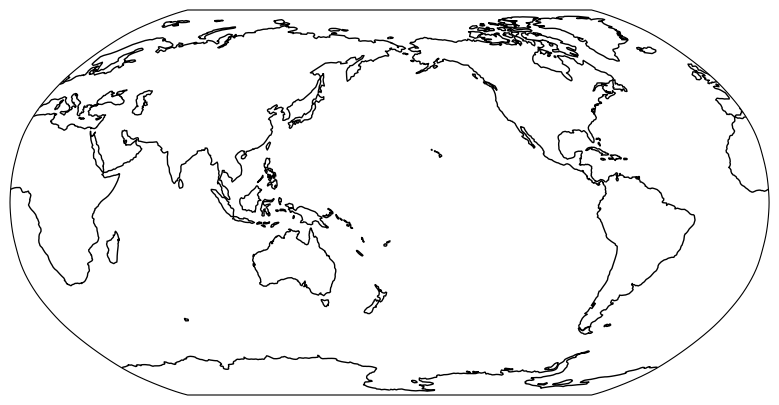

In [19]:
### First, let's look at the global anomaly at the start of our analysis period

cbar_kwargs = dict(orientation = "horizontal", fraction = 0.05, pad=0.05)
kwargs = dict(x='lon', y='lat',transform = ccrs.PlateCarree(), cbar_kwargs = cbar_kwargs)

fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection':ccrs.Robinson(180)})

ax.coastlines()



In [14]:
### How can we subset our dataset to this region?

lat_bounds = [0.5, 20]
lon_bounds = [40, 70]



In [26]:
### Picking a region in the Arabian Sea to look at timeseries of the seasonal climatology
### Plotting as line plot from mean of data

monthly_climatology = ds.sst.groupby("time.month").std()

# plt.figure(figsize=(10,5))
# plt.plot(np.arange(1, 13), monthly_climatology.sel(lat=slice(lat_bounds[0], lat_bounds[1]),
#                                     lon=slice(lon_bounds[0], lon_bounds[1])).mean(['lat','lon']))



(array([5.794713e+06, 1.647824e+06, 1.584246e+06, 1.437027e+06,
        1.484614e+06, 1.817971e+06, 2.340789e+06, 4.336983e+06,
        2.291953e+06, 3.745000e+03]),
 array([-1.79999995,  1.99525237,  5.79050446,  9.58575726, 13.3810091 ,
        17.1762619 , 20.97151566, 24.7667675 , 28.56201935, 32.3572731 ,
        36.15252304]),
 <BarContainer object of 10 artists>)

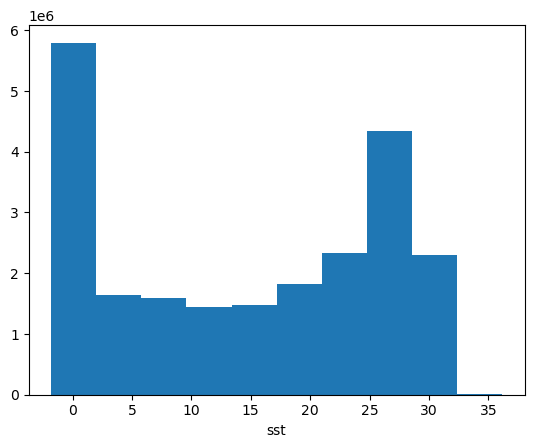

In [31]:
ds.sst.plot.hist()

### DIY exploration: What if you wanted to 
- Look at the monthly climatology in a different region? At a single point?
- Look at the mean SST on non-monthly timescales?
- Look at a different statistic?

Report back on what you find!

In [32]:
monthly_anomaly = (ds.sst.groupby("time.month") - monthly_climatology)
monthly_anomaly

<xarray.DataArray 'sst' (time: 1095, lat: 89, lon: 359)> Size: 140MB
array([[[ 0.       ,        nan,        nan, ...,        nan,
                nan,        nan],
        [ 0.       ,        nan,        nan, ...,        nan,
                nan,        nan],
        [ 0.       ,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [ 0.       , -1.6954414, -1.7240497, ..., -1.6693283,
         -1.6824526, -1.693487 ],
        [ 0.       , -1.667254 , -1.639614 , ..., -1.6959709,
         -1.6903933, -1.6988671],
        [ 0.       , -1.7401812, -1.7264065, ..., -1.7268965,
         -1.748094 , -1.7603706]],

       [[ 0.       ,        nan,        nan, ...,        nan,
                nan,        nan],
        [ 0.       ,        nan,        nan, ...,        nan,
                nan,        nan],
        [ 0.       ,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [ 0.       , -1.7277344, -1.7556293, ..., -1.6951833,
         -1.7178289, -1.7277193],
        [ 0.       , -1.7079922, -1.6880054, ..., -1.7082585,
         -1.7026792, -1.7092947],
        [ 0.       , -1.7461663, -1.7325264, ..., -1.7312262,
         -1.7568921, -1.7699422]],

       [[ 0.       ,        nan,        nan, ...,        nan,
                nan,        nan],
        [ 0.       ,        nan,        nan, ...,        nan,
                nan,        nan],
        [ 0.       ,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [ 0.       , -1.725234 , -1.748129 , ..., -1.697683 ,
         -1.7178289, -1.7277193],
        [ 0.       , -1.7079922, -1.6880054, ..., -1.7082585,
         -1.705179 , -1.7117945],
        [ 0.       , -1.7461663, -1.7375265, ..., -1.733726 ,
         -1.7593923, -1.772442 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 9kB 2021-01-01 2021-01-02 ... 2023-12-31
  * lat      (lat) float64 712B -89.0 -87.0 -85.0 -83.0 ... 81.0 83.0 85.0 87.0
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0
    month    (time) int64 9kB 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12

In [33]:
p = monthly_anomaly.polyfit(dim='time', deg=1)

fit = xr.polyval(monthly_anomaly['time'], p.polyfit_coefficients)

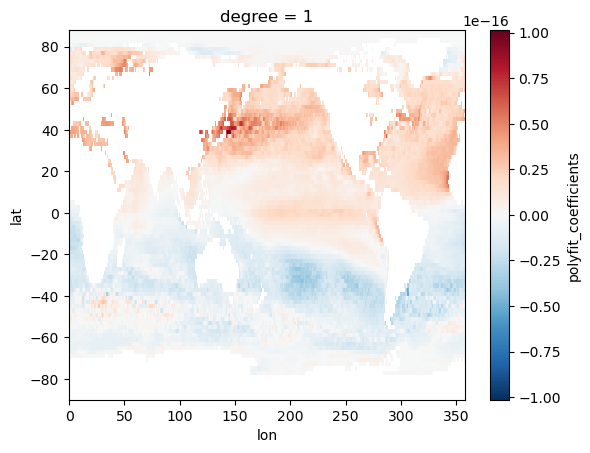

In [34]:
p.polyfit_coefficients.isel(degree=0).plot.pcolormesh()

### We may also be interested in deviations from the mean (e.g. anomaly from the seasonal climatology)

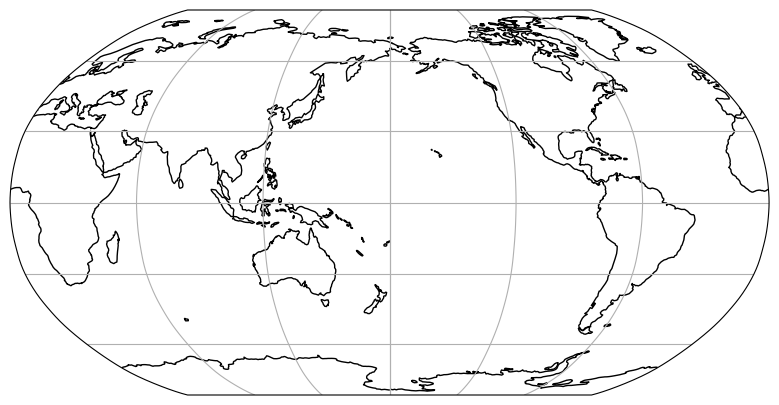

In [16]:
### First, let's look at the global anomaly at the start of our analysis period

cbar_kwargs = dict(orientation = "horizontal", fraction = 0.05, pad=0.05)
kwargs = dict(x='lon', y='lat',transform = ccrs.PlateCarree(), cbar_kwargs = cbar_kwargs)

fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection':ccrs.Robinson(180)})

ax.coastlines()
ax.gridlines()
ax.set_global()


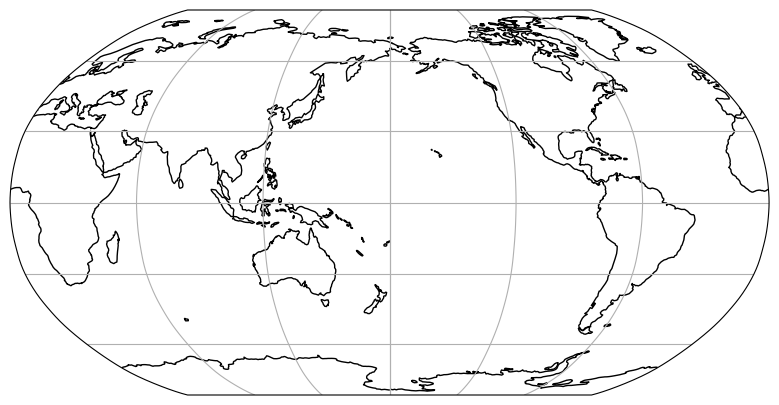

In [20]:
### First, let's look at the global anomaly at the start of our analysis period

cbar_kwargs = dict(orientation = "horizontal", fraction = 0.05, pad=0.05)
kwargs = dict(x='lon', y='lat',transform = ccrs.PlateCarree(), cbar_kwargs = cbar_kwargs)

fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection':ccrs.Robinson(180)})

ax.coastlines()
ax.gridlines()
ax.set_global()



In [21]:
### Again, looking at this data at a single point

plt.figure(figsize=(12,5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [239]:
### Some useful tidbits of code if you want to replot the monthly climatology 
# on the same axis as your anomaly
# date_range = xr.date_range("2021-01-01", "2024-01-01", freq="MS")

# # access the month index (1, 2, ..., 12) for each date:
# months = date_range.month

# # create a DataArray from the above. The coordinate is the full date range
# # and will become the time dim in the result. The values are the months
# # that we would like to select from the climatology
# selector = xr.DataArray(months, dims=["time"], coords=[date_range])

# # select from the climatology, reshaping to be indexed by `time`
# time_series = monthly_climatology.sel(month=selector)

# monthly_anomaly = (ds.sst.groupby("time.month") - monthly_climatology)

# plt.figure(figsize=(12,5))
# monthly_anomaly.sel(lat=plat, lon=plon).plot()
# plt.ylabel('SST anomaly from climatology ($\degree$C)')
# plt.twinx()
# time_series.sel(lat=plat, lon=plon).plot(zorder=-1, color='orange',ls='--')
# plt.xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2024-01-01'))
# plt.ylabel('Climatological SST ($\degree$C)')


### We also want to remove the linear trend, especially if we do any low-pass filtering or Fourier transform

In [38]:
# We can fit a polynomial of degree 1 to the monthly anomalies 


# Now, apply that polynomial to get the fitted values from the data




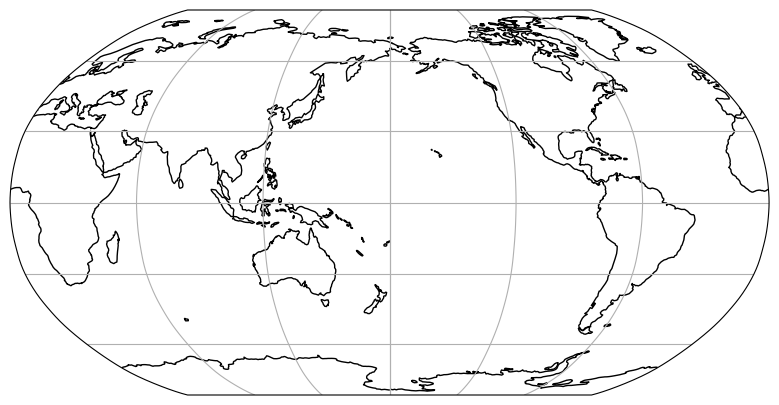

In [22]:
### We can extract information from this polyfit to look at how different regions might be warming or cooling
# on average from 2021 to 2024

cbar_kwargs = dict(orientation = "horizontal", fraction = 0.05, pad=0.05)
kwargs = dict(x='lon', y='lat',transform = ccrs.PlateCarree(), cbar_kwargs = cbar_kwargs)

fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection':ccrs.Robinson(180)})

ax.coastlines()
ax.gridlines()
ax.set_global()



In [23]:
# Just to check, let's see how this linear trend fits our monthly anomaly data at the western Arabian Sea region


In [24]:
plt.figure(figsize=(12,5))





<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>